<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import statistics

# Praktikum

1. 6 metode template matching

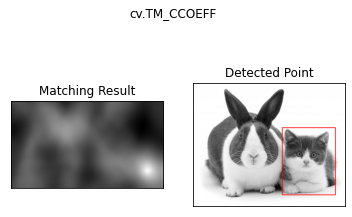

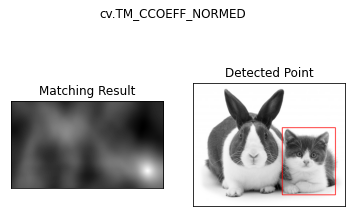

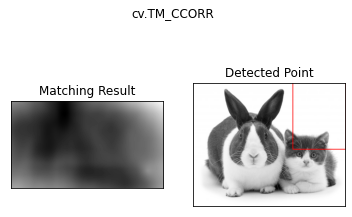

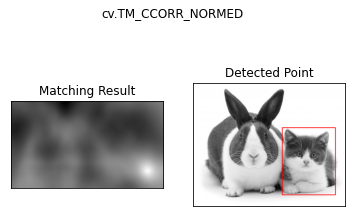

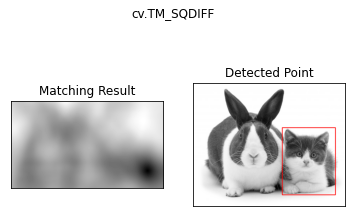

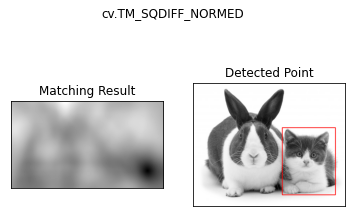

In [3]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/cats_and_bunnies.jpg',0)
template = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/cat2_templatejpg.jpg',0)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method in methods:
    img_copy = img.copy()
    method_eval = eval(method)

    res = cv.matchTemplate(img_copy,template,method_eval)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method_eval in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = template.shape  
    bottom_right = (top_left[0]+width, top_left[1]+height)
    cv.rectangle(img_copy,top_left, bottom_right, (255,0,0), 3)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_copy, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

    plt.show()

2. Edge Detection
<br>
Sumber: https://learnopencv.com/edge-detection-using-opencv/

In [29]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/parking-lot-cars.jpg') 

#Convert img to gray & give gaussian blur

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray,(3,3), 0)

(Text(0.5, 1.0, 'Sobel XY'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

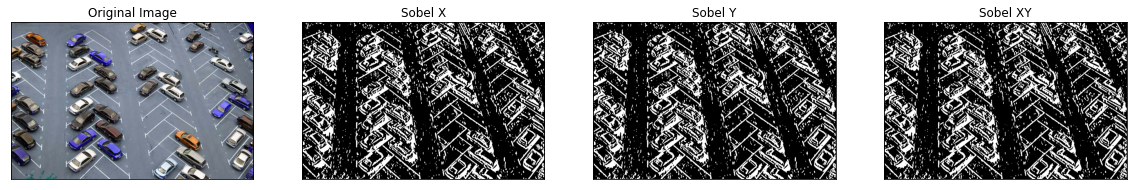

In [40]:
#Sobel Detection
sobel_x = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
sobel_y = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
sobel_xy = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)

sobels = [sobel_x, sobel_y, sobel_xy]

_, sobel_x = cv.threshold(sobel_x, 127, 255, cv.THRESH_BINARY_INV)
_, sobel_y = cv.threshold(sobel_y, 127, 255, cv.THRESH_BINARY_INV)
_, sobel_xy = cv.threshold(sobel_xy, 127, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(20,20))

plt.subplot(141),plt.imshow(img,cmap = 'binary')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobel_x,cmap = 'binary')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobel_y,cmap = 'binary')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(sobel_xy,cmap = 'binary')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

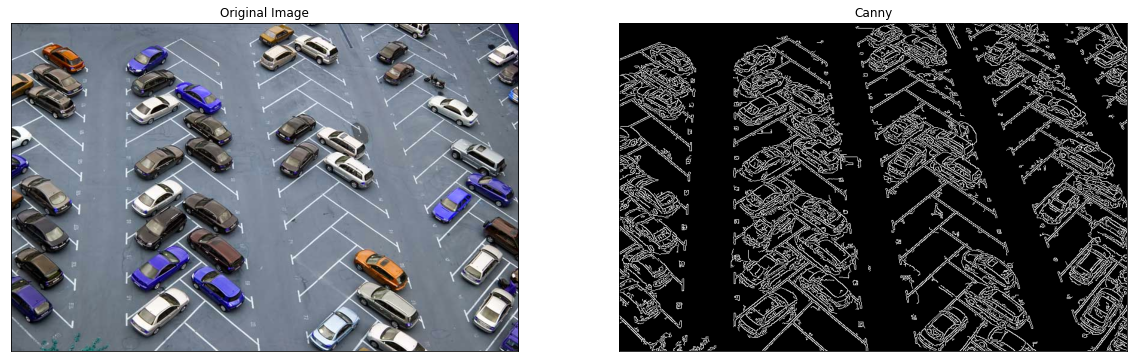

In [43]:
#Canny Edge Detection
canny = cv.Canny(img_gray, threshold1=20, threshold2=200)

plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

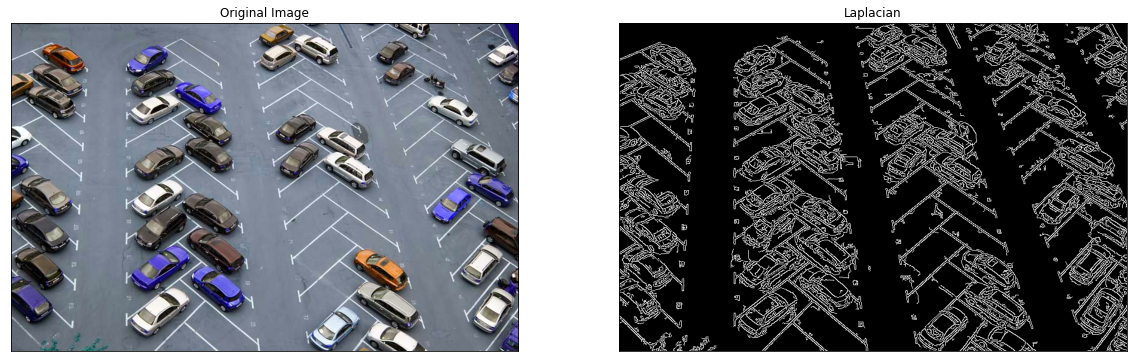

In [44]:
#Laplacian Edge Detection
laplacian = cv.Laplacian(img_blur, ksize=3, ddepth=cv.CV_16S)

plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

3. Corner Detection
<br>
Sumber: <br> 
- https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/
- https://www.geeksforgeeks.org/python-corner-detection-with-shi-tomasi-corner-detection-method-using-opencv/

In [ ]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/chess-board.jpg') 

#Convert img to gray & convert to float32

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_float = np.float32(img_gray)

(Text(0.5, 1.0, 'Harris'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

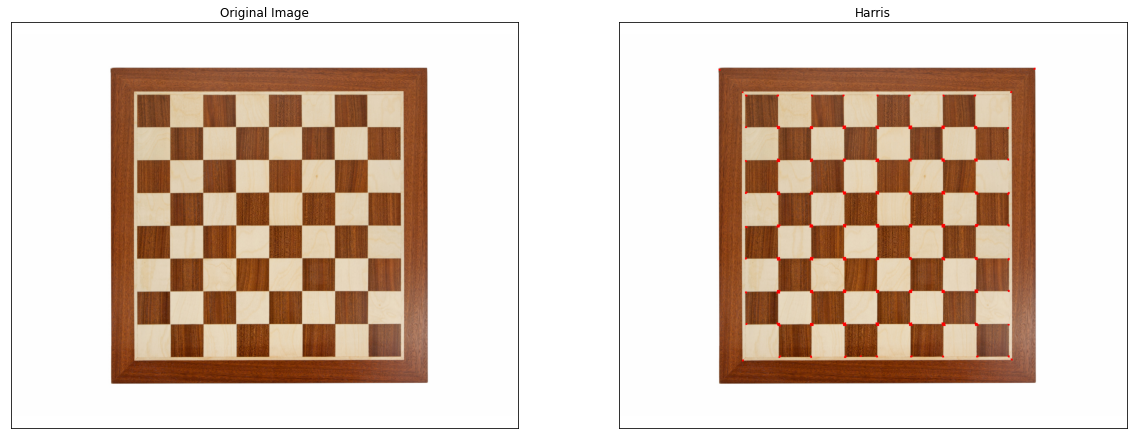

In [47]:
# Harris Corner Detection
harris = cv.cornerHarris(img_float, 2, 5, 0.07)
 
# Results are marked through the dilated corners
harris = cv.dilate(harris, None)
 
# Reverting back to the original image,
# with optimal threshold value
img_harris = img.copy()
img_harris[harris > 0.01 * harris.max()]=[0, 0, 255]

plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title('Harris'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Shi-Thomas'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

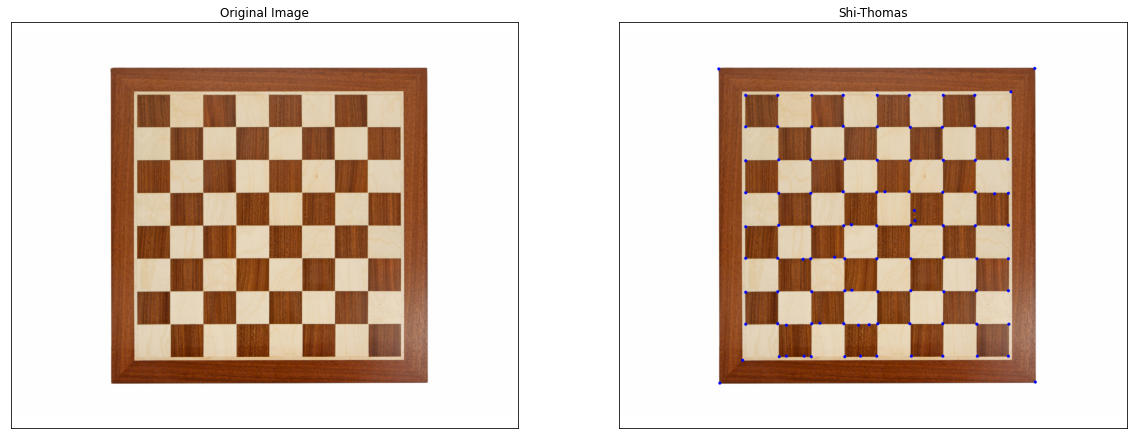

In [49]:
# Shi-Thomas Corner Detection
img_shi_tomas = img.copy()
corners = cv.goodFeaturesToTrack(img_gray, 100, 0.01, 10)
  
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)
  
# draw red color circles on all corners
for i in corners:
    x, y = i.ravel()
    cv.circle(img_shi_tomas, (x, y), 3, (255, 0, 0), -1)

plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(img_shi_tomas, cv.COLOR_BGR2RGB))
plt.title('Shi-Thomas'), plt.xticks([]), plt.yticks([])

4. Hough Transform
<br>
Sumber: https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

(Text(0.5, 1.0, 'Hough'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

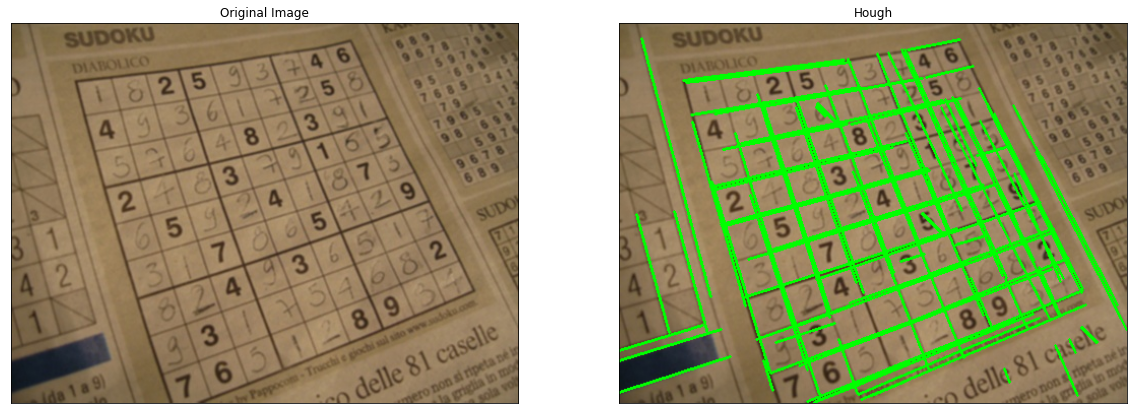

In [56]:
# Read image 
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/sudoku.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_hough = img.copy()

# Use canny edge detection
edges = cv.Canny(img_gray,50,150,apertureSize=3)
 
# Apply HoughLinesP method to
# to directly obtain line end points
lines = cv.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv.line(img_hough,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    # lines_list.append([(x1,y1),(x2,y2)])

plt.figure(figsize=(20,20))
     
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(img_hough, cv.COLOR_BGR2RGB))
plt.title('Hough'), plt.xticks([]), plt.yticks([])

5. Find Contours

(Text(0.5, 1.0, 'Contours'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

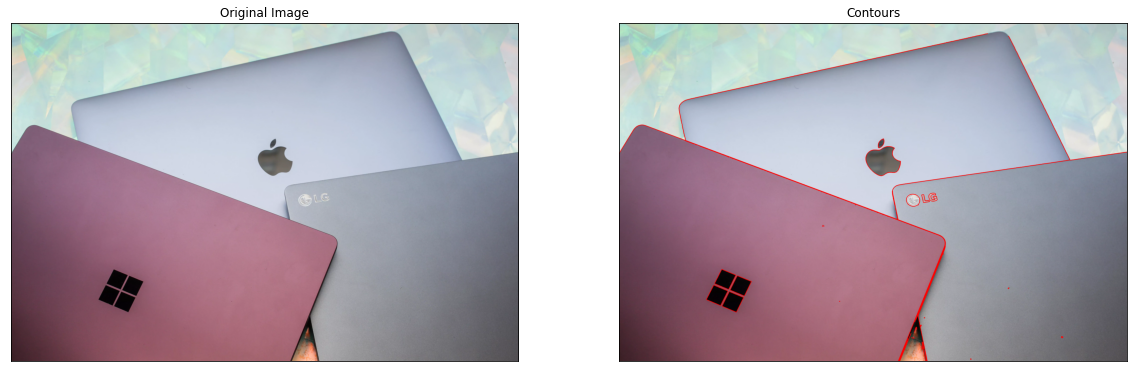

In [59]:
# Read image 
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 11/Resource/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_contours = img.copy()

# Find Canny edges
edged = cv.Canny(img_gray, 30, 200)
cv.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
  
# Draw all contours
# -1 signifies drawing all contours
cv.drawContours(img_contours, contours, -1, (0, 0, 255), 3)

plt.figure(figsize=(20,20))
     
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(img_contours, cv.COLOR_BGR2RGB))
plt.title('Contours'), plt.xticks([]), plt.yticks([])